In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

# Read the dataset

In [144]:
df = pd.read_csv("titanic_dataset (1).csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [146]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check and handle missing values in the dataset

In [147]:
df1=df

In [148]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null value present in this dataset

There are 177 missing Values in Age column, 687 missing Values in Cabin column ,and 2 missing Values in Embarked column.

0.38910778230082704


<AxesSubplot:xlabel='Age', ylabel='Density'>

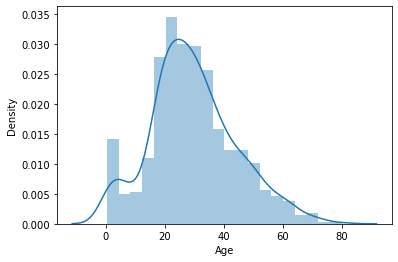

In [149]:
import warnings
print(df1["Age"].skew())
sns.distplot(df1["Age"])


Since the value of skewness is between -0.5 and 0.5 we can consider the data to be fairly symmetrical.

Hence, We'll proceed to fill the missing values with Mean/Median

In [150]:
df1["Age"] = df1["Age"].fillna(df1["Age"].median())
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Next , Handling NaN in the Cabin

Since "Cabin" is a categorical feature, for now we can use the Mode to fill in the missing values.

In [151]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [152]:
#Cabin_mode = df1["Cabin"].mode()
#Cabin_mode

In [153]:
#df1["Cabin"] = df1["Cabin"].fillna("C123")
#df1

In [142]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,C123,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,C123,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,C123,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,C123,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C123,S


#### Next , Handling NaN in the Embarked

Since "Embarked" is a categorical feature, for now we can use the Mode to fill in the missing values.

In [122]:
Embarked_mode = df1["Embarked"].mode()
Embarked_mode

0    S
Name: Embarked, dtype: object

In [123]:
df1["Embarked"] = df1["Embarked"].fillna("Q")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C123,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,C123,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,C123,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


We've handled all the missing values in the Dataset

### Checking for Outliers in Age Column.

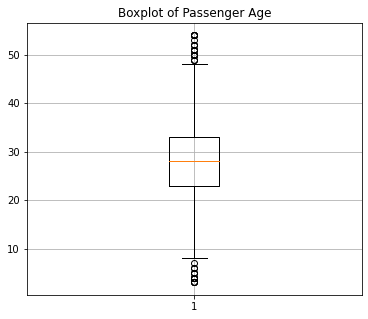

In [124]:
plt.figure(figsize=(6,5))
plt.boxplot(df1["Age"])
plt.title("Boxplot of Passenger Age")
plt.grid();

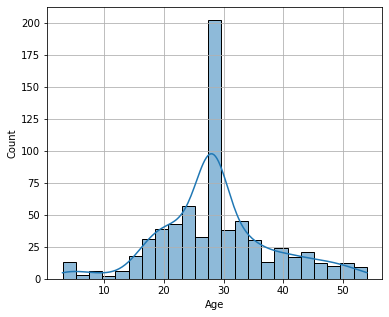

In [125]:
plt.figure(figsize = (6,5))
sns.histplot(data = df1, x= "Age",kde=True);
plt.grid()

In [126]:
df1["Age"].skew()

0.24373807676018766

In [127]:
Q1 = df1['Age'].quantile(0.25)
Q2 = df1['Age'].quantile(0.5)
Q3 = df1["Age"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df1["Age"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df1[(df1["Age"] > upper_limit)|(df1["Age"] < lower_limit)].index
print(f"\n{index}")
df1.drop(index, inplace=True)
df1.describe()

Q1 = 23.0, 
Q2 = 28.0,
Q3 = 33.0, 
IQR = 10.0, 

Lower limit = 8.0,
Upper limit = 48.0

Int64Index([  6,  10,  43,  58, 150, 177, 184, 193, 222, 249, 259, 317, 348,
            406, 407, 434, 448, 449, 458, 482, 526, 535, 571, 582, 597, 599,
            618, 631, 691, 695, 714, 720, 723, 750, 751, 774, 777, 796, 857,
            869],
           dtype='int64')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,449.958075,0.321429,2.527950,28.369565,0.260870,0.248447,15.924707
std,259.446839,0.467388,0.708202,7.785523,0.489666,0.750581,12.430063
min,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,221.750000,0.000000,2.000000,24.000000,0.000000,0.000000,7.854200
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,10.008300
75%,672.500000,1.000000,3.000000,32.000000,0.000000,0.000000,21.018750
max,891.000000,1.000000,3.000000,48.000000,2.000000,6.000000,57.000000


### Handling the Outliers in SibSp column

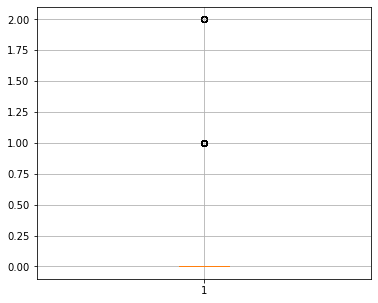

In [128]:
plt.figure(figsize=(6,5))
plt.boxplot(data=df1, x = "SibSp");

plt.grid();

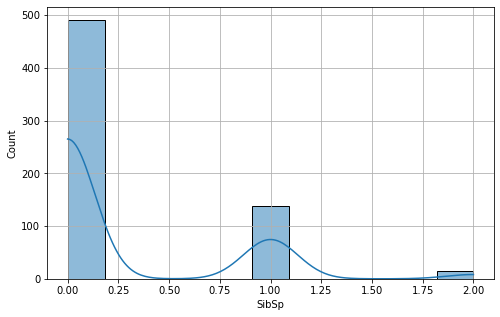

In [129]:
plt.figure(figsize = (8,5))
sns.histplot(data = df1, x= "SibSp",kde=True);
plt.grid()

In [130]:
Q1 = df1['SibSp'].quantile(0.25)
Q2 = df1['SibSp'].quantile(0.5)
Q3 = df1["SibSp"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df1["SibSp"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)
        
index = df1[(df1["SibSp"] > upper_limit)|(df1["SibSp"] < lower_limit)].index
print(f"\n{index}")
df1.drop(index, inplace=True)
df1.describe()

Q1 = 0.0, 
Q2 = 0.0,
Q3 = 0.0, 
IQR = 0.0, 

Lower limit = 0.0,
Upper limit = 0.0

Int64Index([  0,   3,   9,  13,  18,  25,  35,  38,  39,  40,
            ...
            817, 830, 852, 854, 860, 861, 866, 871, 874, 888],
           dtype='int64', length=153)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.000000,491.000000,491.0,491.000000,491.000000
mean,458.415479,0.297352,2.547862,28.285132,0.0,0.136456,13.308551
std,259.923227,0.457559,0.708008,7.482712,0.0,0.553020,10.845770
min,3.000000,0.000000,1.000000,8.000000,0.0,0.000000,0.000000
25%,228.500000,0.000000,2.000000,23.750000,0.0,0.000000,7.750000
50%,461.000000,0.000000,3.000000,28.000000,0.0,0.000000,8.050000
75%,688.500000,1.000000,3.000000,31.000000,0.0,0.000000,13.000000
max,891.000000,1.000000,3.000000,48.000000,0.0,5.000000,56.929200


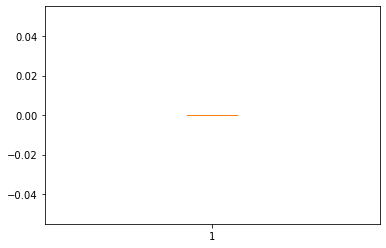

In [131]:
plt.boxplot(data=df1, x = "SibSp");

### Handling the outliers in "Fare" feature 

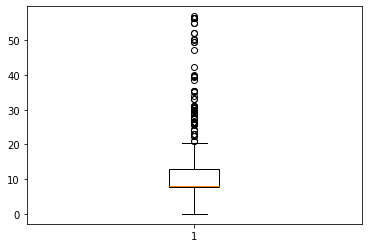

In [132]:
plt.boxplot(df1["Fare"]);

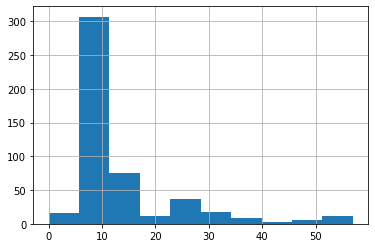

In [133]:
df1["Fare"].hist();

In [134]:
df1["Fare"].skew()

2.2424391619788664

In [135]:
Q1 = df1['Fare'].quantile(0.25)
Q2 = df1['Fare'].quantile(0.5)
Q3 = df1["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

print(f"Q1 = {Q1}, \nQ2 = {Q2},\nQ3 = {Q3}, \nIQR = {IQR}, \n\nLower limit = {lower_limit},\nUpper limit = {upper_limit}")

outlier = []
for x in df1["Fare"]:
    if x < lower_limit or x > upper_limit:
        outlier.append(x)

index = df1[(df1["Fare"] > upper_limit)|(df1["Fare"] < lower_limit)].index
print(index)
df1.drop(index, inplace=True)
df1.describe()

Q1 = 7.75, 
Q2 = 8.05,
Q3 = 13.0, 
IQR = 5.25, 

Lower limit = -0.125,
Upper limit = 20.875
Int64Index([ 20,  23,  30,  55,  64,  74,  83,  98, 110, 136, 148, 166, 168,
            169, 185, 187, 194, 209, 211, 237, 270, 273, 284, 295, 298, 309,
            331, 339, 351, 356, 397, 419, 427, 430, 447, 452, 460, 462, 475,
            506, 507, 508, 509, 512, 515, 517, 533, 536, 539, 551, 567, 572,
            583, 596, 602, 604, 607, 632, 638, 643, 651, 662, 692, 701, 705,
            707, 710, 711, 740, 766, 782, 791, 793, 811, 826, 838, 839, 842,
            848, 853, 862, 867, 880, 885, 887, 889],
           dtype='int64')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,405.000000,405.000000,405.000000,405.000000,405.0,405.000000,405.000000
mean,451.948148,0.251852,2.765432,27.634568,0.0,0.076543,8.978712
std,259.994097,0.434613,0.457923,7.077526,0.0,0.367717,3.179534
min,3.000000,0.000000,1.000000,9.000000,0.0,0.000000,0.000000
25%,226.000000,0.000000,3.000000,23.000000,0.0,0.000000,7.750000
50%,442.000000,0.000000,3.000000,28.000000,0.0,0.000000,7.895800
75%,681.000000,1.000000,3.000000,30.000000,0.0,0.000000,10.500000
max,891.000000,1.000000,3.000000,48.000000,0.0,3.000000,20.525000


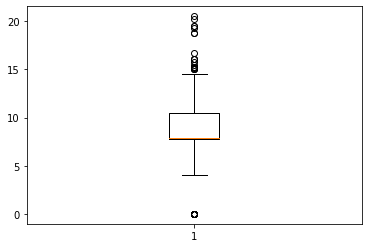

In [136]:
plt.boxplot(df1["Fare"]);

## Performing the min max scaling

In [137]:
df1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,C123,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,C123,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,C123,S


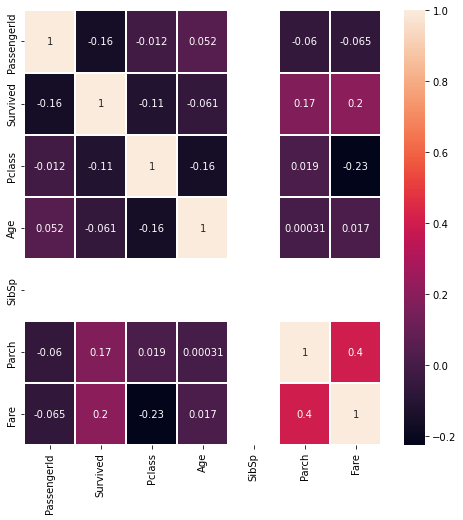

In [138]:
corr = df1.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr, annot=True,linewidths=0.2);

In [139]:
X = df1.drop(["Survived","Name","Sex","Ticket","Embarked"], axis=1)
X


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin
2,3,3,26.0,0,0,7.9250,C123
4,5,3,35.0,0,0,8.0500,C123
5,6,3,28.0,0,0,8.4583,C123
8,9,3,27.0,0,2,11.1333,C123
12,13,3,20.0,0,0,8.0500,C123
...,...,...,...,...,...,...,...
882,883,3,22.0,0,0,10.5167,C123
883,884,2,28.0,0,0,10.5000,C123
884,885,3,25.0,0,0,7.0500,C123
886,887,2,27.0,0,0,13.0000,C123


In [154]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,405.000000,405.000000,405.000000,405.0,405.000000,405.000000
mean,451.948148,2.765432,27.634568,0.0,0.076543,8.978712
std,259.994097,0.457923,7.077526,0.0,0.367717,3.179534
min,3.000000,1.000000,9.000000,0.0,0.000000,0.000000
25%,226.000000,3.000000,23.000000,0.0,0.000000,7.750000
50%,442.000000,3.000000,28.000000,0.0,0.000000,7.895800
75%,681.000000,3.000000,30.000000,0.0,0.000000,10.500000
max,891.000000,3.000000,48.000000,0.0,3.000000,20.525000


# Classification

In [167]:
df2_train = df1


In [169]:
corr_matrix = df2_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

In [171]:
df2_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data Preparation

In [174]:
q = [ 'PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_train_set = df2_train.drop(q, axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


In [175]:
z = [ 'PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
df_train_set = df2_train.drop(z, axis=1)
df_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,male,7.2500,S
1,1,1,female,71.2833,C
2,1,3,female,7.9250,S
3,1,1,female,53.1000,S
4,0,3,male,8.0500,S


#### Translate non-numerical features to numerical features

In [177]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_train_set.iloc[:, 2] = labelencoder.fit_transform(df_train_set.iloc[:, 2].values)
df_train_set.iloc[:, 4] = labelencoder.fit_transform(df_train_set.iloc[:, 4].values)



In [178]:
df_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int32  
dtypes: float64(1), int32(2), int64(2)
memory usage: 28.0 KB


#### Train data split

In [179]:
x = df_train_set.iloc[:, 1:5].values
y = df_train_set.iloc[:, 0].values

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=4,test_size=0.4)
x_train.shape

(534, 4)

In [181]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(534, 4)
(357, 4)
(534,)
(357,)


### 1) Logistic Regression Model

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_test)

y_train_pred = model.predict(x_train) #To checking training data prediction & accuracy in future

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred))
print("\nThe accuracy score of LR model is : ", accuracy_score(y_test,predict))
print("The F1 score of LR model is : ", f1_score(y_test,predict,average="micro"))
print("\nThe accuracy score of LR model is : \n", confusion_matrix(y_test,predict))

Training Accuracy is :  0.7659176029962547

The accuracy score of LR model is :  0.7955182072829131
The F1 score of LR model is :  0.7955182072829131

The accuracy score of LR model is : 
 [[193  41]
 [ 32  91]]


#### 2) KNN Model

In [186]:
from sklearn.neighbors import KNeighborsClassifier


classifer = KNeighborsClassifier(n_neighbors=4,metric = "minkowski") 
classifer.fit(x_train,y_train)
predict1 = classifer.predict(x_test)

y_train_pred1 = classifer.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred1))
print("\nThe accuracy score of KNN model is : ", accuracy_score(y_test,predict1))
print("The F1 score of KNN model is : ", f1_score(y_test,predict1,average="micro"))
print("\nThe confusion matrix of KNN model is : \n", confusion_matrix(y_test,predict1))

Training Accuracy is :  0.8183520599250936

The accuracy score of KNN model is :  0.7787114845938375
The F1 score of KNN model is :  0.7787114845938375

The confusion matrix of KNN model is : 
 [[211  23]
 [ 56  67]]


#### 3) SVM Model

In [187]:
from sklearn import svm
from sklearn.svm import SVC

svm_linear = SVC(kernel= "linear")
svm_linear.fit(x_train,y_train)
predict2a = svm_linear.predict(x_test)

y_train_pred2a = svm_linear.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred2a))
print("\nThe accuracy score of linear SVM model is : ", accuracy_score(y_test,predict2a))
print("The f1 score of linear SVM model is : ", f1_score(y_test,predict2a, average="micro"))
print("\nThe confusion matrix for linear SVM model is : \n", confusion_matrix(y_test,predict2a))

Training Accuracy is :  0.7734082397003745

The accuracy score of linear SVM model is :  0.8067226890756303
The f1 score of linear SVM model is :  0.8067226890756303

The confusion matrix for linear SVM model is : 
 [[204  30]
 [ 39  84]]


#### 4) Decision Tree Model

In [188]:
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)
predict3 = d_tree.predict(x_test)

y_train_pred3 = d_tree.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred3))
print("\nThe accuracy score of Decision tree model is : ", accuracy_score(y_test,predict3))
print("The f1 score of Decision tree model is : ", f1_score(y_test,predict3,average="micro"))
print("\nThe confusion matrix of Decision tree model is : \n", confusion_matrix(y_test,predict3))

Training Accuracy is :  0.9044943820224719

The accuracy score of Decision tree model is :  0.834733893557423
The f1 score of Decision tree model is :  0.834733893557423

The confusion matrix of Decision tree model is : 
 [[216  18]
 [ 41  82]]


#### 5) Random Forest Classifier Model

In [189]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
predict4 = rf_model.predict(x_test)

y_train_pred4 = rf_model.predict(x_train)

print("Training Accuracy is : ", accuracy_score(y_train, y_train_pred4))
print("\nThe accuracy score for Random Forest Model is : ", accuracy_score(y_test,predict4))
print("The f1 score is : ", f1_score(y_test,predict4,average="micro"))
print("\n The confusion matrix is : \n", confusion_matrix(y_test,predict4))

Training Accuracy is :  0.9044943820224719

The accuracy score for Random Forest Model is :  0.8263305322128851
The f1 score is :  0.8263305322128852

 The confusion matrix is : 
 [[208  26]
 [ 36  87]]


Overall Summary for the Various models created :

After Analysing the Data

In general terms , all the Models are performing relatively well.

Accuracy score for Logistic Regression Model is, 0795

Accuracy score for KNN Model is, 0.778

Accuracy score for Linear SVM Model is, 0.81

Accuracy score for Decision Tree Model is, 0.83

Accuracy score for Random Forest Classifier Model is, 0.85